# 합성곱 신경망의 시각화
- 합성곱 층이 이미지에서 어떤 것을 학습하는지 합성곱 층의 가중치와 특성맵을 그림으로 시각화
- 합성곱 신경망의 동작 원리에 대한 개념 이해를 도움
- 케라스는 Sequential클래스 이외에도 복잡한 모델 생성을 위한 함수형 API를 제공

In [1]:
# 실행마다 동일한 결과를 얻기 위해 케라스에 랜덤 시드를 사용하고 텐서플로 연산을 결정적으로 만듭니다. 
import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

C:\Users\LG\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
!pip show tensorflow

Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: c:\users\lg\anaconda3\lib\site-packages
Requires: tensorflow-intel
Required-by: 


## 가중치 시각화
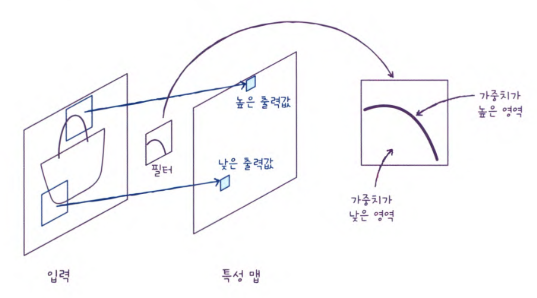
- 곡선 부분을 보면 곡선 부위의 가중치는 높고 그 외의 부분은 낮은 가중치를 가짐
- 둥근 모서리가 있는 입력과 곱해져서 큰 출력값을 만들 수 있음

In [3]:
from tensorflow import keras

In [4]:
# 이전에 훈련했던 체크포인트 파일을 사용(최적의 에포크까지 훈련한 모델 파라미터를 저장하고 있음)
model = keras.models.load_model(r'C:\Users\LG\Downloads\AICC_Week07\03\dl\best-cnn-model.keras')

In [5]:
# 모델의 레이어 확인
model.layers

[<Conv2D name=conv2d, built=True>,
 <MaxPooling2D name=max_pooling2d, built=True>,
 <Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_1, built=True>]

##### 그림으로 이해
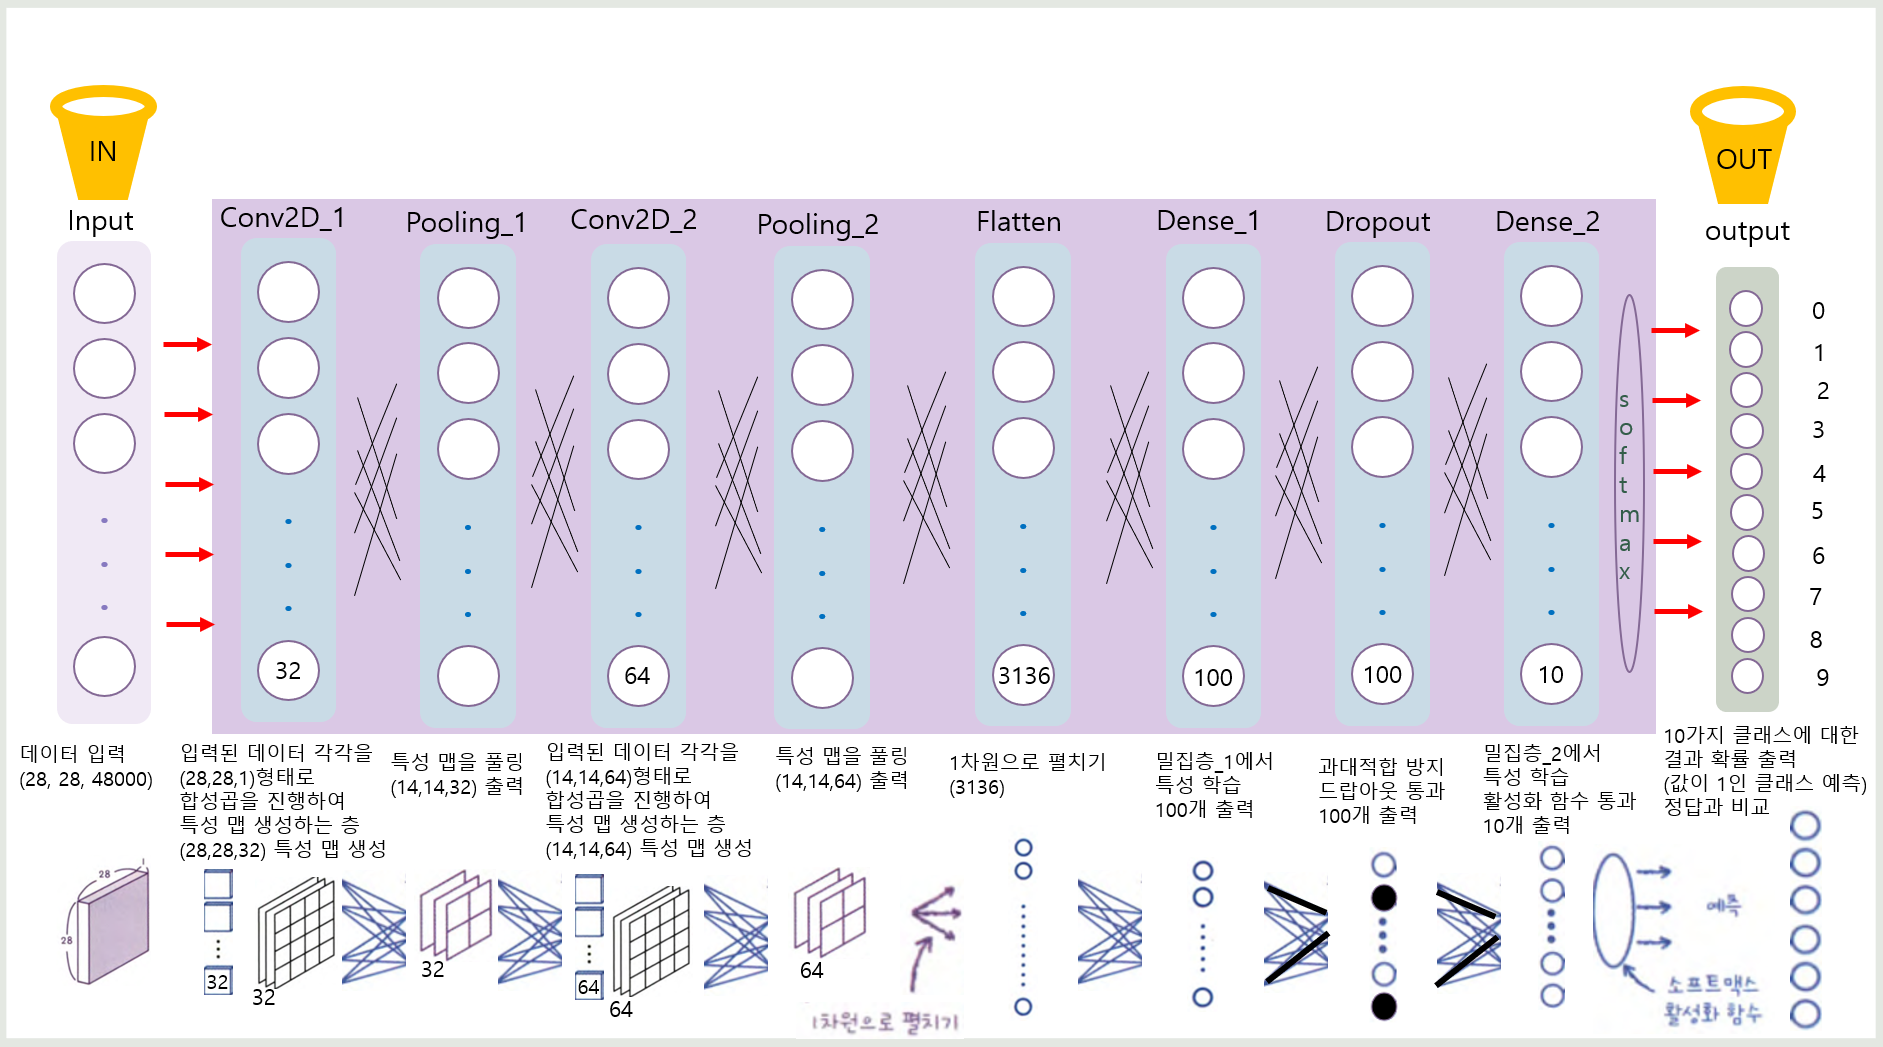

#### 첫 번째 레이어를 선택하여 weights의 첫 번째 요소(가중치)와 두 번째 요소(절편) 확인

In [6]:
conv = model.layers[0]

conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

##### 해석
- 커널 크기가 (3,3)이었음
- 합성곱 층에 전달되는 입력의 깊이는 1이므로 실제 커널 크기는 (3,3,1)
- 필터의 개수는 32개이므로 가중치의 크기는 (3,3,1,32)가 됨
- 두 번째 원소는 필터마다 1개의 절편이 있으므로 (32,)

In [7]:
# weights의 속성은 텐서플로우의 다차원 배열을 나타내는 Tensor클래스 객체
# 다루기 쉬운 넘파이 배열로 변환하여 가중치 배열의 평균, 표준편차를 계산
conv_weights = conv.weights[0].numpy()
conv_weights.shape

(3, 3, 1, 32)

In [8]:
conv_weights.mean(), conv_weights.std()

(-0.018327534, 0.24970777)

##### 해석
- 가중치의 평균값은 0에 가깝고 표준편차는 0.23정도로 확인됨
- 가중치의 분포를 히스토그램으로 확인

In [9]:
import matplotlib.pyplot as plt

In [10]:
conv_weights.reshape(-1, 1).shape

(288, 1)

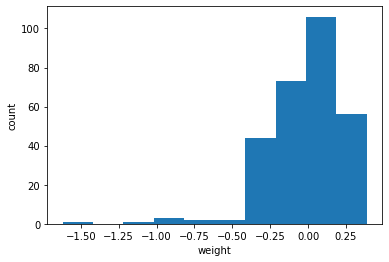

In [11]:
# 히스토그램을 그리기 위해 conv_weights배열을 1차원 배열로 전달
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

##### 해석
- 0을 중심으로 종 모양의 분포를 보임

#### 32개의 커널을 16개씩 두 줄로 출력하기

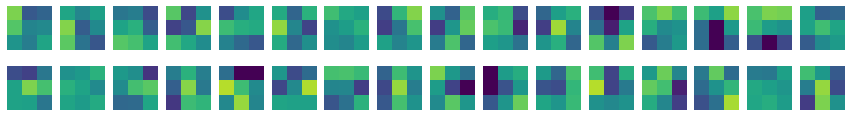

In [12]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

##### 설명
- conv_weights에 32개의 가중치를 저장한 배열의 마지막 차원을 순회하면서 0부터 i*16+j번째까지 가중치 값을 출력
- i는 행 인덱스(0 ~ 1), j는 열 인덱스(0 ~ 15)
- conv_weights[:, :, 0, 0] ~ conv_weights[:, :, 0, 31] 까지를 출력하는 것
- imshow()는 배열에 있는 최대값과 최소값을 사용하여 픽셀의 강도를 표시(vmin=-0.5, vmax=0.5 로 강도의 기준 설정)
- 결과를 보면 정확하게 이해하기는 어렵지만 어떤 패턴이 있다는 것을 볼 수 있음

#### 앞의 결과와 비교를 위한 훈련하지 않은 빈 합성곱 신경망 생성하기

In [13]:
no_training_model = keras.Sequential()

# Conv2D 층 한 개 추가
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', 
                                          padding='same', input_shape=(28,28,1)))

C:\Users\LG\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# 추가된 첫 번째 층(Conv2D)의 가중치를 별도의 변수에 저장 
no_training_conv = no_training_model.layers[0]

no_training_conv.weights[0].shape

TensorShape([3, 3, 1, 32])

In [15]:
# 저장된 가중치의 평균과 표준편차 확인
no_training_weights = no_training_conv.weights[0].numpy()

no_training_weights.mean(), no_training_weights.std()

(0.0053191613, 0.08463709)

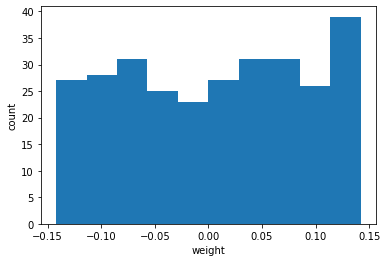

In [16]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

##### 결과
- 가중치가 -0.15 ~ 0.15사이에 분포하고 있고 비교적 고르게 만들어져 있음
- 텐서플로우가 신경망의 가중치를 처음 초기화 할 때 균등 분포에서 랜덤하게 값을 선택한다는 것을 알 수 있음

#### 랜덤으로 만들어진 가중치를 이미지로 표현

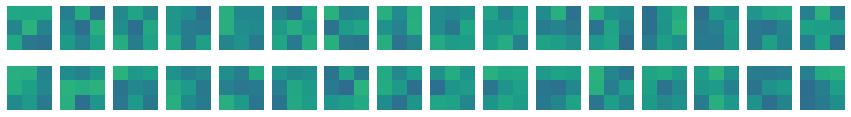

In [17]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

##### 결과
- 훈련된 모델의 가중치 이미지(앞에서 출력한 이미지) 
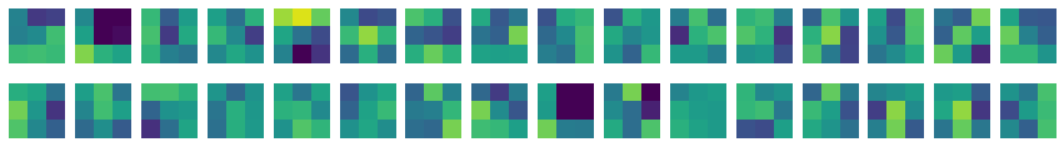
- 훈련이 끝난 가중치의 이미지와 비교하면 큰 특징을 찾기 어려운 이미지가 출력됨
- 합성곱 신경망이 패션 MNIST 데이터셋의 분류 정확도를 높이기 위해 어떤 유용한 패턴을 학습한 것이다라고 이해할 수 있음

## 함수형 API
- Sequential클래스를 이용하여 층을 추가하듯 생성하는 방법 이외에 함수형 API를 활용할 수 있음
- 딥러닝에서 좀 더 복잡한 모델을 만드는 경우 활용
    - 입력이 2개이거나 출력이 2거나 하는 형식일 경우 Sequential클래스 이용이 어려울 수 있음

### 케라스의 함수형 API 사용 개념
- 케라스의 Model클래스를 사용하여 모델 생성함

#### 예제
- 앞에서 만들었던 Dense가 2개인 완전 연결 신경망을 함수형 API로 구현하는 예제

In [18]:
# 2개의 Dense층 객체 생성
dense1 = keras.layers.Dense(100, activation='sigmoid')
dense2 = keras.layers.Dense(10, activation='softmax')

In [19]:
# Sequential클래스는 InputLayer를 자동으로 추가하고 호출
# Model클래스를 사용할 때는 직접 만들어서 InputLayer의 출력과 같은 값을 모델의 입력값으로 만들어주어야 함
inputs = keras.Input(shape=(784,))
inputs

<KerasTensor shape=(None, 784), dtype=float32, sparse=None, name=keras_tensor_38>

In [20]:
# 만들어진 객체는 Sequential객체를 생성하여 add()로 추가하거나 직접 호출하여 사용 가능
hidden = dense1(inputs)
hidden

<KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=keras_tensor_39>

In [21]:
# hidden을 dense2객체에 전달하여 사용 가능
outputs = dense2(hidden)
outputs

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_40>

In [22]:
# 모델 객체 생성 시 입력과 출력을 연결
model = keras.Model(inputs, outputs)

In [23]:
# 모델에 추가된 입력과 출력을 확인
model.input, model.output

(<KerasTensor shape=(None, 784), dtype=float32, sparse=None, name=keras_tensor_38>,
 <KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_40>)

#### 만들어진 모델의 층 그림으로 이해하기
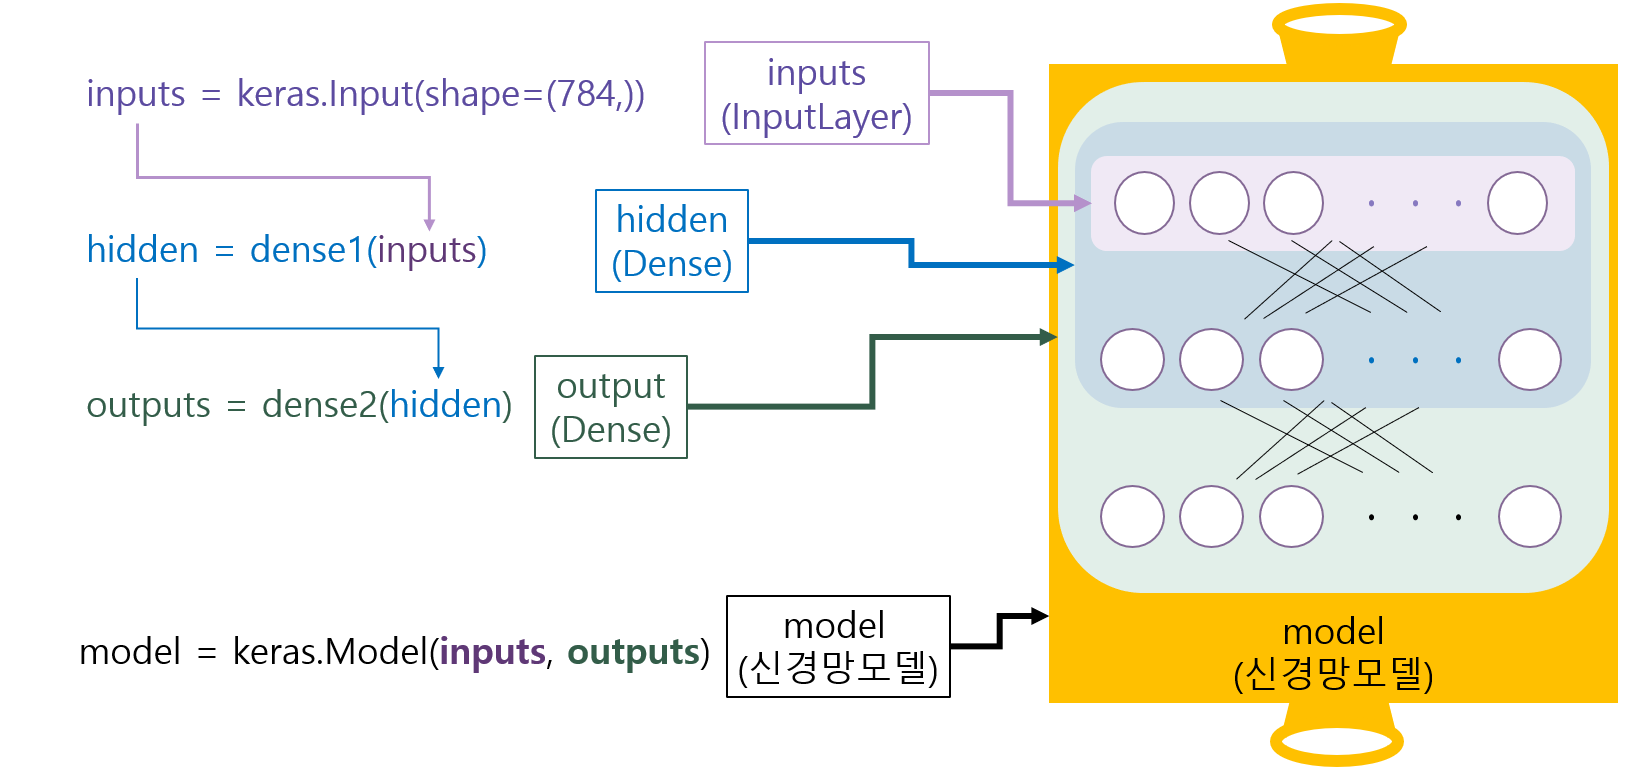

#### 여기서 함수형 API를 이용하여 모델을 생성한 이유
- Sequential 모델을 생성하여 사용하면 predict()시 모든 층을 통과한 후 최종 결과만 얻을 수 있음
- 여기서는 특정 층의 결과만 확인하고자 하는데 특성맵의 결과만을 얻기 위해 함수형 API를 활용
- 앞에서 생성한 model역시 predict()호출 시 최종 결과를 반환
- 모델에서 특정 층을 지정하여 출력을 얻을 수 있음
    - 위 그림을 보면 각 층 객체를 참조하는 참조변수가 있음(inputs, hidden, outputs)
    - 참조변수를 이용하여 부분만 가져와 모델을 생성하고 중간층의 결과를 확인해볼 수 있음

In [24]:
# 현재 모델에 추가된 층 확인
model.layers

[<InputLayer name=input_layer_1, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>]

In [25]:
# 첫 번째 층의 출력 정보
model.layers[0].output

<KerasTensor shape=(None, 784), dtype=float32, sparse=None, name=keras_tensor_38>

In [26]:
# 두 번째 층의 출력 정보
model.layers[1].output

<KerasTensor shape=(None, 100), dtype=float32, sparse=False, name=keras_tensor_39>

In [27]:
# 세 번째 층의 출력 정보
model.layers[2].output

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, name=keras_tensor_40>

In [28]:
# 모델의 입력과 특정 층(첫 번째 층)의 출력을 확인할 수 있는 새로운 모델 생성 예시
conv_acti = keras.Model(model.input, model.layers[1].output)
conv_acti

<Functional name=functional_12, built=True>

##### 설명
- 함수형 API를 이용하여 층을 다양하게 조합한 결과를 확인할 수 있음을 이해

## 특성 맵 시각화

#### 데이터 로딩

In [29]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

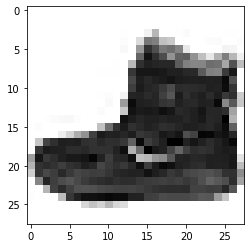

In [30]:
plt.imshow(X_train[0], cmap='gray_r')
plt.show()

#### 모델의 입력과 출력을 이용하여 중간 층의 결과 얻기
- 첫 번째 합성곱 층의 결과 특성 맵 확인
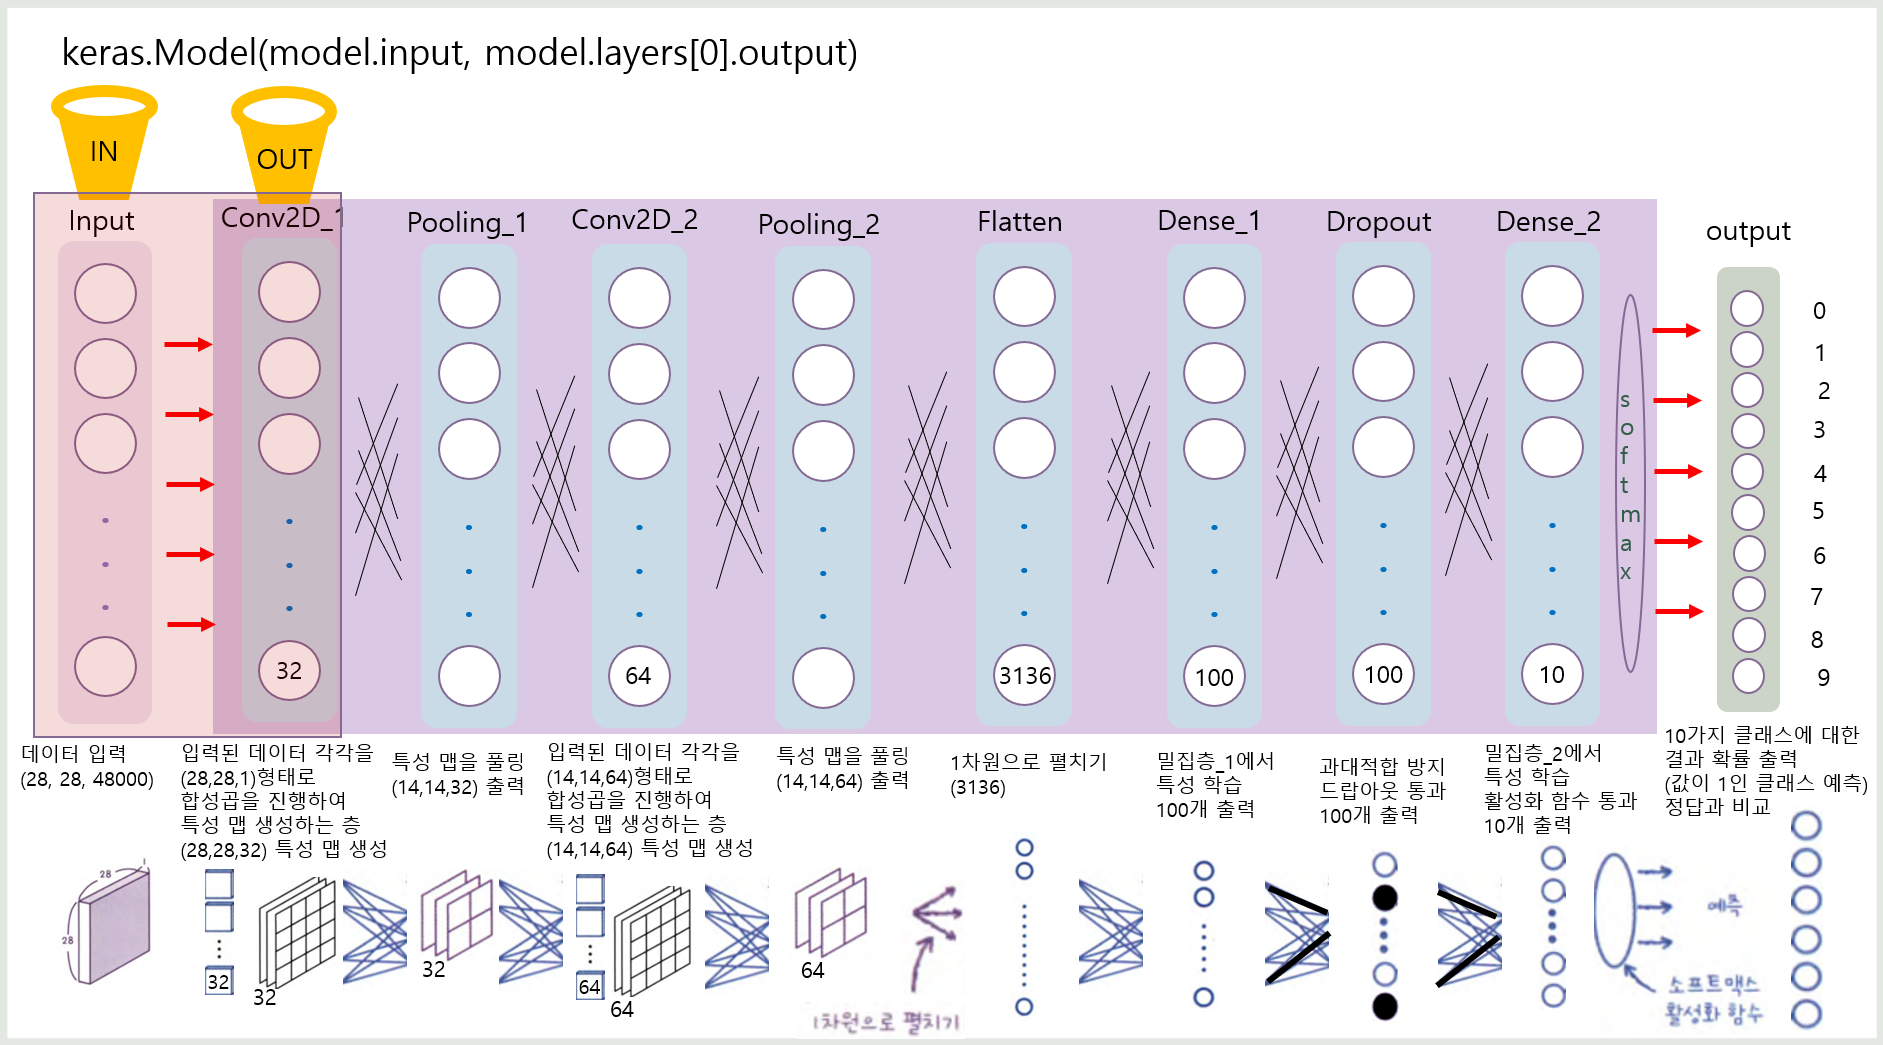

In [31]:
from tensorflow import keras

# 이전에 훈련했던 체크포인트 파일을 사용(최적의 에포크까지 훈련한 모델 파라미터를 저장하고 있음)
model = keras.models.load_model('C:\\Users\\LG\\Downloads\\AICC_Week07\\03\\dl\\best-cnn-model.keras')

# 입력 레이어와 첫 번째 레이어(합성곱)를 이용하여 부분적인 층을 가지는 모델 생성
conv_acti = keras.Model(model.inputs, model.layers[0].output)

inputs = X_train[0:1].reshape(-1, 28, 28, 1)/255.0

feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [32]:
#import numpy as np
#from tensorflow import keras

# 모델 경로 수정
#model_path = r'C:\Users\LG\Downloads\AICC_Week07\03\dl\best-cnn-model.keras'

# 모델 불러오기
#model = keras.models.load_model(model_path)

# 더미 데이터를 사용하여 모델을 한 번 호출합니다.
#dummy_input = np.zeros((1, 28, 28, 1))  # 모델의 입력 크기에 맞는 데이터 생성
#_ = model.predict(dummy_input)

# ModelCheckpoint 콜백 수정
#checkpoint_cb = keras.callbacks.ModelCheckpoint(
   # filepath='C:\\Users\\LG\\Downloads\\AICC_Week07\\03\\dl\\best-cnn-model.keras',
    #save_best_only=True
#)

# 모델 컴파일
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# 학습 데이터 및 검증 데이터에 대한 학습
#history = model.fit(X_train_scaled, y_train, epochs=20,
 #                   validation_data=(X_test_val_scaled, y_test_val),
  #                  callbacks=[checkpoint_cb])

# 이후 코드 실행


In [33]:
print(feature_maps.shape)

(1, 28, 28, 32)


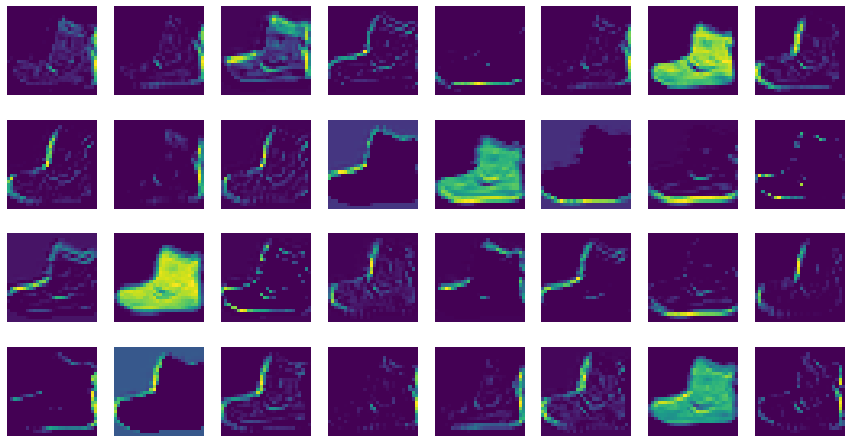

In [34]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

##### 결과
- 총 32개의 특성맵이 생성됨
- 이미지에서 필터를 통해 강하게 활성화된 부분을 표현

- 두 번째 합성곱 층에서 만들어진 특성 맵 확인
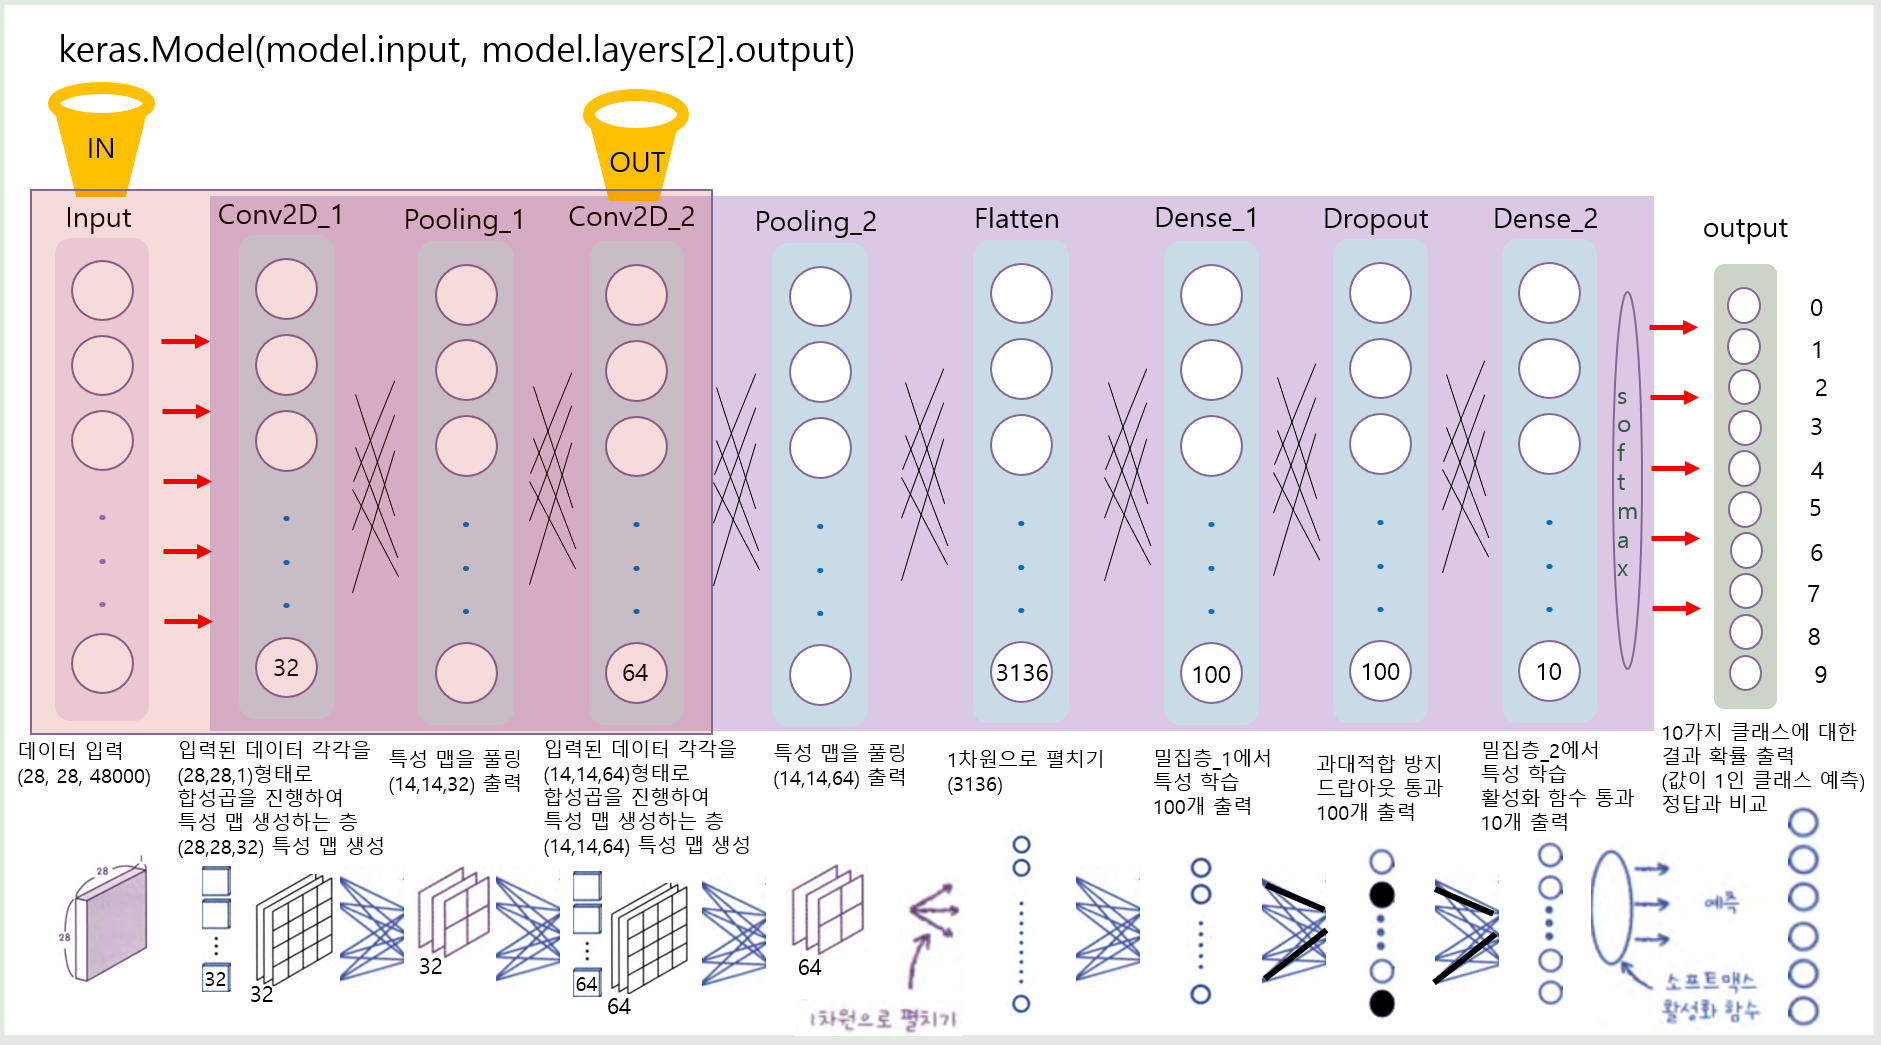

In [37]:
# 입력 레이어와 세 번째 레이어(합성곱)를 이용하여 부분적인 층을 가지는 모델 생성
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [38]:
conv2_acti.summary()

Model: "functional_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 18,816 (73.50 KB)

 Trainable params: 18,816 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
feature_maps = conv2_acti.predict(X_train[0:1].reshape(-1, 28, 28, 1)/255.0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [40]:
print(feature_maps.shape)

(1, 14, 14, 64)


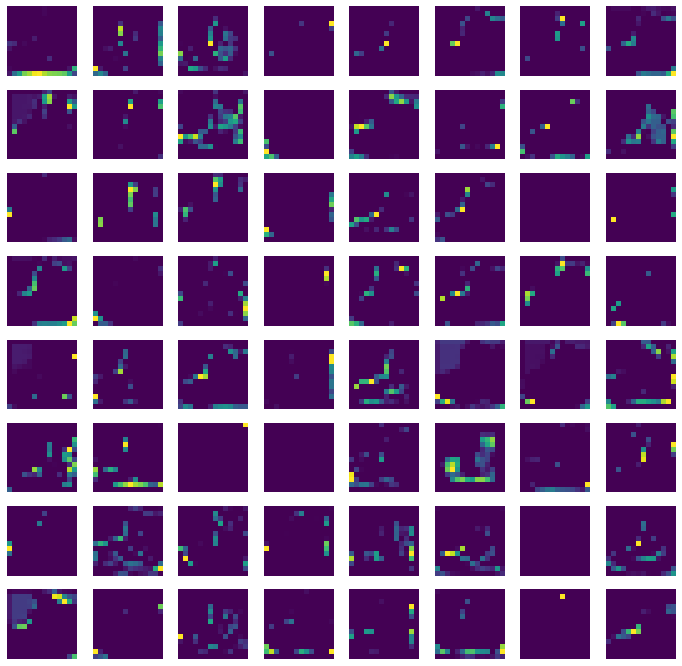

In [41]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

##### 결과
- 두 번째 합성곱 층의 필터는 64개 이므로 64개의 이미지를 확인할 수 있음
- 첫 번째 합성곱에서 만들어진 특성맵(32)을 바탕으로 추가적으로 특성을 파악하는 형태
- 층이 많아질 수록 뒤에 층에서 만들어낸 특성맵은 이해하기 어려워짐(정확도는 높아질 것임)
- 합성곱 신경망이 어떤 방식으로 이미지를 이해하는지 개념파악